In [7]:
import numpyro.distributions.transforms

import numpy as np
import jax.tree_util
import functools
from jax import numpy as jnp

from numpyro import distributions as dist
from numpyro.infer import MCMC, NUTS

from matplotlib import pyplot as plt

In [63]:
with numpyro.handlers.seed(rng_seed=0):
    x = numpyro.sample("x",dist.Normal(0,1))
print(f"{x.shape=}")

x.shape=()


In [64]:
with numpyro.handlers.seed(rng_seed=0):
    with numpyro.plate('plate_name',size=3):
        x = numpyro.sample('x',dist.Normal(0,1))
print(f"{x.shape=}")

x.shape=(3,)


In [65]:
with numpyro.handlers.seed(rng_seed=0):
    x = numpyro.sample('x',dist.Normal(0,1))
    with numpyro.plate('plate_name',size=3):
        y = numpyro.sample('y',dist.Normal(0,1))
print(f"{x.shape=}")
print(f"{y.shape=}")

x.shape=()
y.shape=(3,)


In [67]:
with numpyro.handlers.seed(rng_seed=0):
    x = numpyro.sample('x',dist.Normal(0,1))
    with numpyro.plate('plate_name',size=3):
        y = numpyro.sample('y',dist.Normal(0,1))
        with numpyro.plate('second_plate_name',size=5):
            z = numpyro.sample('z',dist.Normal(y,1))
print(f"{x.shape=}")
print(f"{y.shape=}")
print(f"{z.shape=}")

x.shape=()
y.shape=(3,)
z.shape=(5, 3)


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1293.61it/s, 3 steps of size 9.72e-01. acc. prob=0.94]


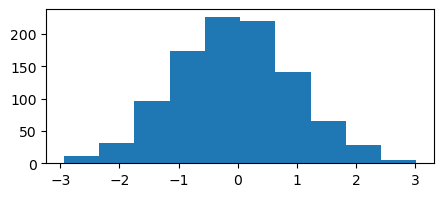

np.mean(xs)=Array(-0.07294951, dtype=float32)
np.var(xs)=Array(0.98631704, dtype=float32)


In [17]:
def model():
    x = numpyro.sample('x',dist.Normal(0,1))

nuts_kernel = NUTS(model)
rng_key = jax.random.PRNGKey(0)
mcmc = MCMC(nuts_kernel, num_warmup=1000, num_samples=1000)
mcmc.run(rng_key)
xs = mcmc.get_samples()['x']
plt.figure(figsize=(5,2))
plt.hist(xs)
plt.show()
print(f"{np.mean(xs)=}")
print(f"{np.var(xs)=}")

sample: 100%|██████████| 2000/2000 [00:01<00:00, 1198.91it/s, 3 steps of size 8.18e-01. acc. prob=0.92]


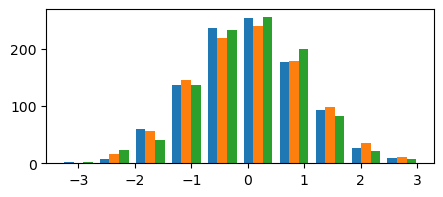

np.mean(xs,axis=0)=Array([ 0.02676438,  0.04651814, -0.00437136], dtype=float32)
np.var(xs,axis=0)=Array([0.9185764, 1.0152618, 0.9216567], dtype=float32)


In [25]:
def model():
    with numpyro.plate('plate_name',3):
        x = numpyro.sample('x',dist.Normal(0,1))

nuts_kernel = NUTS(model)
rng_key = jax.random.PRNGKey(0)
mcmc = MCMC(nuts_kernel, num_warmup=1000, num_samples=1000)
mcmc.run(rng_key)
xs = mcmc.get_samples()['x']
plt.figure(figsize=(5,2))
plt.hist(xs.T)
plt.show()
print(f"{np.mean(xs,axis=0)=}")
print(f"{np.var(xs,axis=0)=}")

sample: 100%|██████████| 2000/2000 [00:01<00:00, 1063.91it/s, 15 steps of size 4.08e-01. acc. prob=0.93]


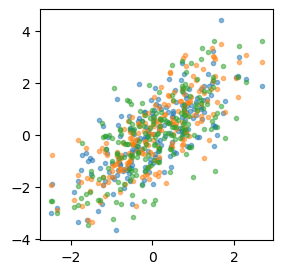

In [36]:
def model():
    x = numpyro.sample('x',dist.Normal(0,1))
    with numpyro.plate('plate_name',3):
        y = numpyro.sample('y',dist.Normal(x,1))

nuts_kernel = NUTS(model)
rng_key = jax.random.PRNGKey(0)
mcmc = MCMC(nuts_kernel, num_warmup=1000, num_samples=1000)
mcmc.run(rng_key)
samps = mcmc.get_samples()
xs = samps['x']
ys = samps['y']
thin = 5
plt.figure(figsize=(3,3))
plt.plot(xs[::thin],ys[::thin],'.',alpha=0.5)
plt.show()

sample: 100%|██████████| 2000/2000 [00:01<00:00, 1045.20it/s, 15 steps of size 4.18e-01. acc. prob=0.93]


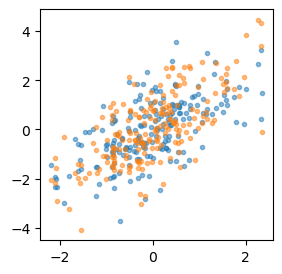

xs.shape=(1000,)
ys.shape=(1000, 2)


In [41]:
def model():
    x = numpyro.sample('x',dist.Normal(0,1))
    with numpyro.plate(name='',size=2):
        y = numpyro.sample('y',dist.Normal(x,1))

nuts_kernel = NUTS(model)
rng_key = jax.random.PRNGKey(0)
mcmc = MCMC(nuts_kernel, num_warmup=1000, num_samples=1000)
mcmc.run(rng_key)
samps = mcmc.get_samples()
xs = samps['x']
ys = samps['y']
thin = 5
plt.figure(figsize=(3,3))
plt.plot(xs[::thin],ys[::thin],'.',alpha=0.5)
plt.show()
print(f"{xs.shape=}")
print(f"{ys.shape=}")

In [59]:
def model():
    x = numpyro.sample('x',dist.Normal(0,1))
    with numpyro.plate(name='yplate',size=2,dim=-1):
        y = numpyro.sample('y',dist.Normal(x,1))
        with numpyro.plate(name='zplate',size=3,dim=-2):
            z = numpyro.sample('z',dist.Normal(y,1))

nuts_kernel = NUTS(model)
rng_key = jax.random.PRNGKey(0)
mcmc = MCMC(nuts_kernel, num_warmup=1000, num_samples=1000)
mcmc.run(rng_key)
samps = mcmc.get_samples()
xs = samps['x']
ys = samps['y']
zs = samps['z']
print(f"{xs.shape=}")
print(f"{ys.shape=}")
print(f"{zs.shape=}")

sample: 100%|██████████| 2000/2000 [00:02<00:00, 953.29it/s, 7 steps of size 2.94e-01. acc. prob=0.90] 

xs.shape=(1000,)
ys.shape=(1000, 2)
zs.shape=(1000, 3, 2)


In [8]:
import numpyro
import jax
from jax import numpy as jnp
dist = numpyro.distributions

def model():
    numpyro.sample("x",dist.Normal(0,1))

kernel = numpyro.infer.NUTS(model)
mcmc = numpyro.infer.MCMC(kernel, num_warmup=250, num_samples=750)
key = jax.random.PRNGKey(0)
mcmc.run(key)

sample: 100%|██████████| 1000/1000 [00:02<00:00, 365.80it/s, 1 steps of size 1.08e+00. acc. prob=0.93]


In [10]:
loc = jnp.array([0,1])
scale = jnp.array([0,1])
def model():
    numpyro.sample("x",jax.vmap(dist.Normal, in_axes=(0,0))(loc,scale))

kernel = numpyro.infer.NUTS(model)
mcmc = numpyro.infer.MCMC(kernel, num_warmup=250, num_samples=750)
key = jax.random.PRNGKey(0)
mcmc.run(key)

TypeError: '>' not supported between instances of 'object' and 'float'

In [11]:
d = jax.vmap(dist.Normal, in_axes=(0,0))(loc,scale)

In [14]:
d.sample(key)

Array([0.        , 0.79415774], dtype=float32)

In [16]:
numpyro.sample("x",d)

AssertionError: 